C:\Users\harri\AppData\Local\Temp\ipykernel_7644\3399236797.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stroke_by_age = df.groupby('age_group')['stroke'].mean() * 100


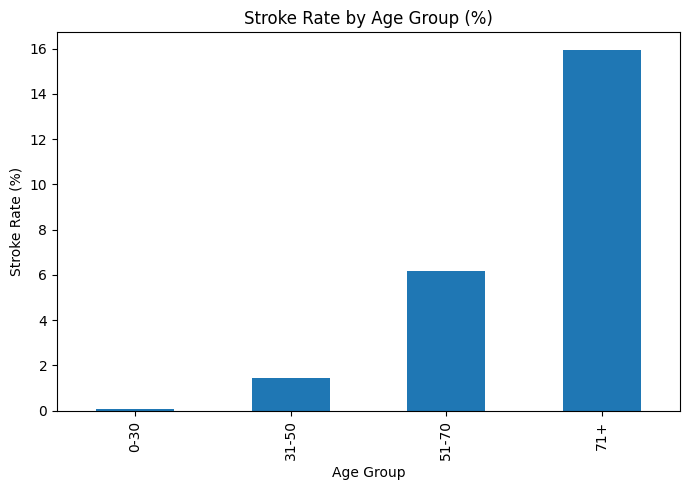

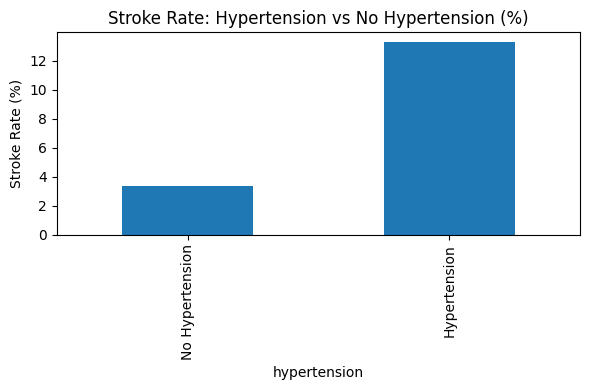

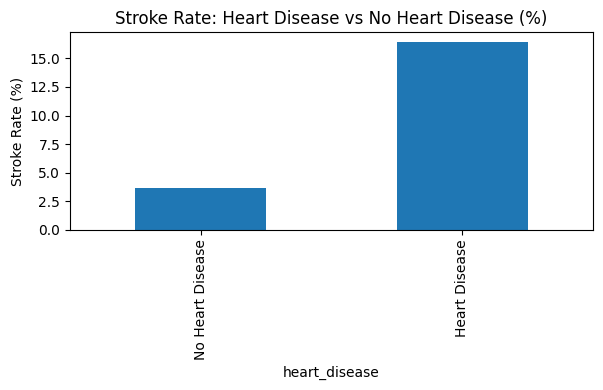

C:\Users\harri\AppData\Local\Temp\ipykernel_7644\3399236797.py:94: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stroke_glucose = df.groupby("glucose_group")["stroke"].mean() * 100


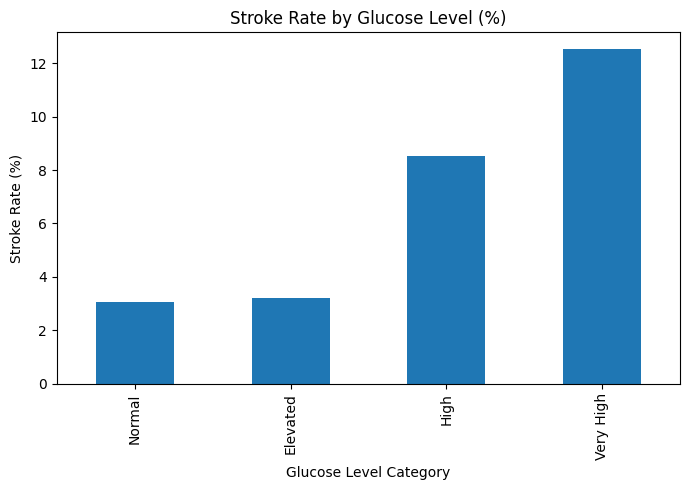

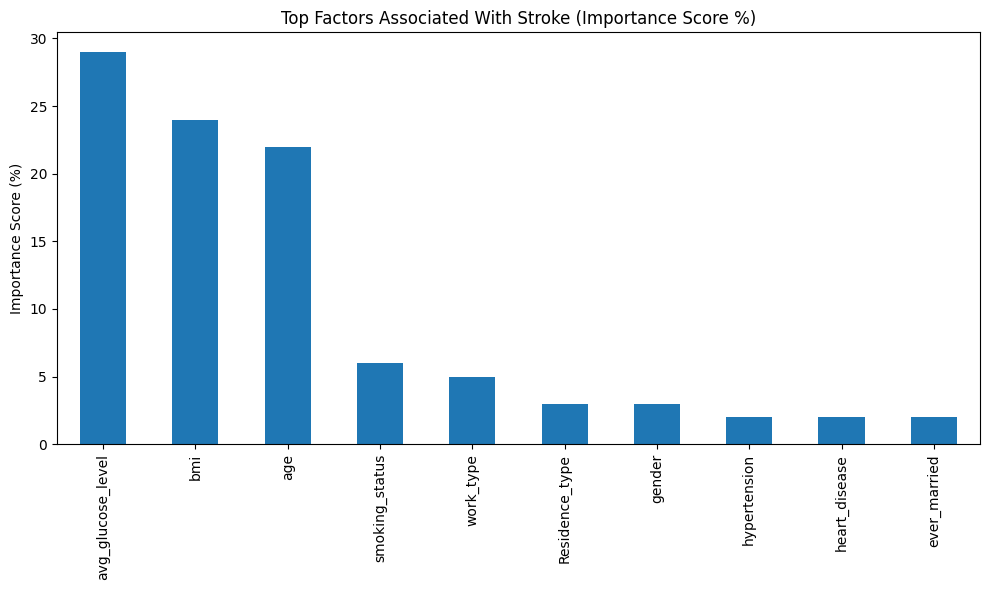

Analysis complete! All figures saved in outputs/figures and processed dataset exported.


In [ ]:
# ============================================================
# FINAL STROKE ANALYSIS PROJECT
# ============================================================

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# ------------------------------------------------------------
# 0. CREATE OUTPUT FOLDERS FOR ARTIFACTS
# ------------------------------------------------------------
os.makedirs("outputs/figures", exist_ok=True)

# ------------------------------------------------------------
# 1. LOAD DATA
# ------------------------------------------------------------
df = pd.read_csv(r"C:\Users\harri\Downloads\outputs\healthcare-dataset-stroke-data.csv")

# ------------------------------------------------------------
# 2. CLEANING
# ------------------------------------------------------------

# Remove rows with missing BMI
df = df.dropna(subset=['bmi'])

# Convert categorical columns
categorical_cols = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]

for col in categorical_cols:
    df[col] = df[col].astype(str)
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Create glucose categories for bar charts
df['glucose_group'] = pd.cut(
    df['avg_glucose_level'],
    bins=[0, 100, 140, 200, 300],
    labels=['Normal', 'Elevated', 'High', 'Very High']
)

# ------------------------------------------------------------
# 3. ANALYSIS: Stroke rate by age group
# ------------------------------------------------------------
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 50, 70, 100],
                         labels=["0-30", "31-50", "51-70", "71+"])

stroke_by_age = df.groupby('age_group')['stroke'].mean() * 100

plt.figure(figsize=(7,5))
stroke_by_age.plot(kind='bar')
plt.title("Stroke Rate by Age Group (%)")
plt.xlabel("Age Group")
plt.ylabel("Stroke Rate (%)")
plt.tight_layout()
plt.savefig("outputs/figures/stroke_by_age.png", dpi=300)
plt.show()

# ------------------------------------------------------------
# 4. Hypertension vs Stroke
# ------------------------------------------------------------
stroke_htn = df.groupby("hypertension")["stroke"].mean() * 100

plt.figure(figsize=(6,4))
stroke_htn.plot(kind='bar')
plt.xticks([0,1], ["No Hypertension", "Hypertension"])
plt.title("Stroke Rate: Hypertension vs No Hypertension (%)")
plt.ylabel("Stroke Rate (%)")
plt.tight_layout()
plt.savefig("outputs/figures/stroke_by_hypertension.png", dpi=300)
plt.show()

# ------------------------------------------------------------
# 5. Heart Disease vs Stroke
# ------------------------------------------------------------
stroke_hd = df.groupby("heart_disease")["stroke"].mean() * 100

plt.figure(figsize=(6,4))
stroke_hd.plot(kind='bar')
plt.xticks([0,1], ["No Heart Disease", "Heart Disease"])
plt.title("Stroke Rate: Heart Disease vs No Heart Disease (%)")
plt.ylabel("Stroke Rate (%)")
plt.tight_layout()
plt.savefig("outputs/figures/stroke_by_heartdisease.png", dpi=300)
plt.show()

# ------------------------------------------------------------
# 6. Glucose Level vs Stroke (BAR CHART)
# ------------------------------------------------------------
stroke_glucose = df.groupby("glucose_group")["stroke"].mean() * 100

plt.figure(figsize=(7,5))
stroke_glucose.plot(kind='bar')
plt.title("Stroke Rate by Glucose Level (%)")
plt.xlabel("Glucose Level Category")
plt.ylabel("Stroke Rate (%)")
plt.tight_layout()
plt.savefig("outputs/figures/stroke_by_glucose.png", dpi=300)
plt.show()

# ------------------------------------------------------------
# 7. FEATURE IMPORTANCE (Random Forest)
# ------------------------------------------------------------

df_model = df[[
    'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
    'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status',
    'stroke'
]]

df_model.to_csv("outputs/processed_data.csv", index=False)

X = df_model.drop("stroke", axis=1)
y = df_model["stroke"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_

# Convert to % + NO DECIMALS
importances_percent = pd.Series(importances, index=X.columns) * 100
importances_percent = importances_percent.round(0)

plt.figure(figsize=(10,6))
importances_percent.sort_values(ascending=False).plot(kind='bar')
plt.title("Top Factors Associated With Stroke (Importance Score %)")
plt.ylabel("Importance Score (%)")
plt.tight_layout()
plt.savefig("outputs/figures/feature_importance.png", dpi=300)
plt.show()

print("Analysis complete! All figures saved in outputs/figures and processed dataset exported.")
